# Instituto Tecnologico de Estudios Superiores del Occidente
![](https://upload.wikimedia.org/wikipedia/en/thumb/5/5f/Western_Institute_of_Technology_and_Higher_Education_logo.png/220px-Western_Institute_of_Technology_and_Higher_Education_logo.png)
  
## Proyecto: Tasa de Natalidad en México   

## Salvador Octavio Briones Martinez  - Is707869  
## Aristofanes Cruz Huante - Is708067

___
## Tasa bruta de Natalidad en México

### Objetivos.
> La tasa bruta de natalidad indica el número de nacimientos vivos ocurridos durante el año por cada 1000 personas estimadas a mitad de año. Debido a esto, se desea conocer las cifras obtenidas durante cada año en el país de México desde 1960 hasta el año 2017, verificando así su tendencias.
> - Estas cifras son importantes para el país, ya que con ella se puede conocer la tendencia de la población y se mediante ello, se pueden determinar acciones futuras.
> - Se tomarán datos sobre dicho tema y se generará un polinomio que aproxime la gráfica generada por los datos
> - Se comparará los resultados reales con los del polinomio y se podrán proveer conclusiones.


Primeramente importaremos las librerias deseadas

In [1]:
import pandas as pd
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt

Incluiremos en este proyecto el archivo con los datos necesarios para poder trabajar.

In [2]:
file_name = 'BirthRateMexico.csv'
data = pd.read_csv(file_name)
data

,Consecutive,Year,Mexico
0,1,1960,45.179
1,2,1961,44.919
2,3,1962,44.698
3,4,1963,44.517
4,5,1964,44.366
5,6,1965,44.232
6,7,1966,44.096
7,8,1967,43.931
8,9,1968,43.712
9,10,1969,43.420


Ahora señalaremos nuestros ejes 'x' y 'y' sobre nuestra recien creada tabla, dejando los consecutivos como el eje 'x' y la tasa de natalidad en el eje 'y'

In [3]:
x = data.iloc[:,0].values
y = data.iloc[:,2].values

Definimos la funcion objetivo.

In [4]:
def fun_obj(beta,x,y,n):
    yhat = beta.dot([x**i for i in range(n+1)])
    e = y-yhat
    return np.sum(e**2)

Realizamos los ajustes para aproximar la gráfica

In [5]:
b01 = np.zeros(2)
b02 = np.zeros(3)
b03 = np.zeros(4)

ajuste1 = opt.minimize(fun_obj,b01,args=(x,y,1))
ajuste2 = opt.minimize(fun_obj,b02,args=(x,y,2))
ajuste3 = opt.minimize(fun_obj,b03,args=(x,y,3))

In [6]:
ajuste1

      fun: 91.16923226817784
 hess_inv: array([[  4.56453071e-05,  -1.28840874e-05],
       [ -1.28840874e-05,   8.13502261e-06]])
      jac: array([ -1.14440918e-05,   1.90734863e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 251
      nit: 6
     njev: 60
   status: 2
  success: False
        x: array([ 46.87801311,  -0.5399081 ])

In [7]:
ajuste2

      fun: 57.066561473163006
 hess_inv: array([[  8.31936787e-02,  -5.68782624e-03,   8.10236081e-05],
       [ -5.68782624e-03,   5.08801313e-04,  -8.10238705e-06],
       [  8.10236081e-05,  -8.10238705e-06,   1.37328616e-07]])
      jac: array([ -4.76837158e-07,   0.00000000e+00,  -9.53674316e-07])
  message: 'Optimization terminated successfully.'
     nfev: 45
      nit: 7
     njev: 9
   status: 0
  success: True
        x: array([  4.86835104e+01,  -7.20457804e-01,   3.06016420e-03])

In [8]:
ajuste3

      fun: 26.26358871996816
 hess_inv: array([[  1.57417447e-01,  -2.01689547e-02,   6.89419334e-04,
         -6.87455127e-06],
       [ -2.01689547e-02,   3.33409797e-03,  -1.26801606e-04,
          1.34123800e-06],
       [  6.89419334e-04,  -1.26801606e-04,   5.12423554e-06,
         -5.63493494e-08],
       [ -6.87455127e-06,   1.34123800e-06,  -5.63493494e-08,
          6.36716771e-10]])
      jac: array([  0.00000000e+00,   0.00000000e+00,   2.38418579e-07,
         2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 60
      nit: 7
     njev: 10
   status: 0
  success: True
        x: array([  4.65779415e+01,  -3.09660265e-01,  -1.41985979e-02,
         1.95014262e-04])

In [9]:
beta1 = ajuste1.x
beta2 = ajuste2.x
beta3 = ajuste3.x

yhat1 = beta1[0] + beta1[1]*x
yhat2 = beta2[0] + beta2[1]*x + beta2[2]*x**2
yhat3 = beta3[0] + beta3[1]*x + beta3[2]*x**2 + beta3[3]*x**3

Generamos la gráfica

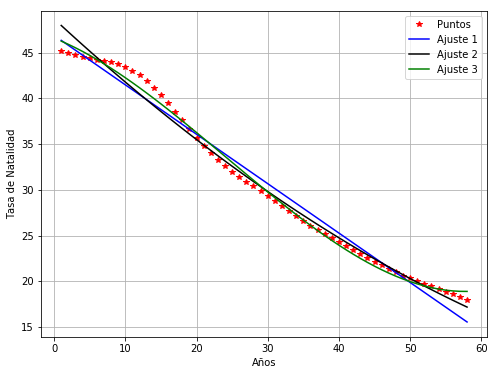

In [12]:
plt.figure(figsize=(8,6))
plt.plot(x,y,'r*',ms = 6,label='Puntos')
plt.plot(x,yhat1,'b',ms = 6,label='Ajuste 1')
plt.plot(x,yhat2,'k',ms = 6,label='Ajuste 2')
plt.plot(x,yhat3,'g',ms = 6,label='Ajuste 3')
plt.grid()
plt.legend(loc='best')
plt.xlabel('Años')
plt.ylabel('Tasa de Natalidad')
plt.show()

Detallamos los erroes por ajuste

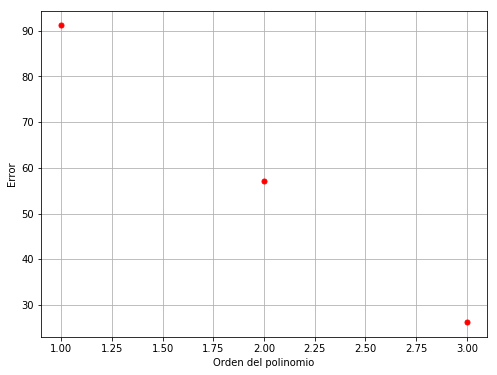

In [11]:
error = [ajuste1.fun,ajuste2.fun,ajuste3.fun]
plt.figure(figsize=(8,6))
plt.plot(range(1,4),error,'ro',ms=5)
plt.xlabel('Orden del polinomio')
plt.ylabel('Error')
plt.grid()
plt.show()

### Liga Github
https://github.com/sbriones97/proyecto_modulo1



### Conclusiones.
> Observando las gráficas obtenidas por los datos proporcionados por la página The World Bank, podemos observar que en los últimos años la tasa de natalidad ha disminuido considerablemente y sigue bajando esta. Esto nos quiere decir que cada día hay más personas que no desean tener hijos o se previene mucho los embarazos.
A través de nuestra gráfica de ajuste de curvas, pudimos concluir que el polinomio que más se ajusta es el de grado tres.


### Referencias.
> NA. (2019). Birth rate, crude (per 1,000 people) - Mexico. Septiembre 2019, de The World Bank Data Sitio web: https://data.worldbank.org/indicator/SP.DYN.CBRT.IN?contextual=default&end=2017&locations=MX&name_desc=false&start=1960&type=points&view=chart

> ( 1 ) United Nations Population Division. World Population Prospects: 2019 Revision. ( 2 ) Census reports and other statistical publications from national statistical offices, ( 3 ) Eurostat: Demographic Statistics, ( 4 ) United Nations Statistical Division. Population and Vital Statistics Reprot ( various years ), ( 5 ) U.S. Census Bureau: International Database, and ( 6 ) Secretariat of the Pacific Community: Statistics and Demography Programme.


<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Cristian Camilo Zapata Zuluaga.
</footer>